#Objective
•	Classifying the articles into different categories?
•	Which category of article should be published maximum for higher number of shares?
•	On What week-day What type of article should Mashable post more?
•	For different categories of articles what should be their min and max content length?


#Exploratory Analysis:

Density Distribution of Shares:
 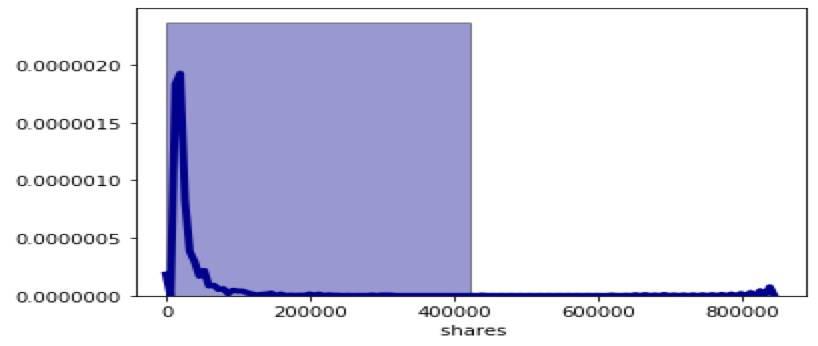
The above graph represents the density distribution of shares in our whole dataset. As we can see we have maximum examples of shares between 0-10,000 shares and gradually decreased with the number of shares increasing. We can actually consider that the shares which are above 20,000 as outliers but in our project these are considered as anomalies. As our project says about the maximum of shares of an article if the article has been shared the most of the time then the features of article has been so peculiar that it has reached maximum of shares. So considering anomality condition we are not classifying these peculiar data  as outliers but as anamolies.


Tokens Vs Images:

 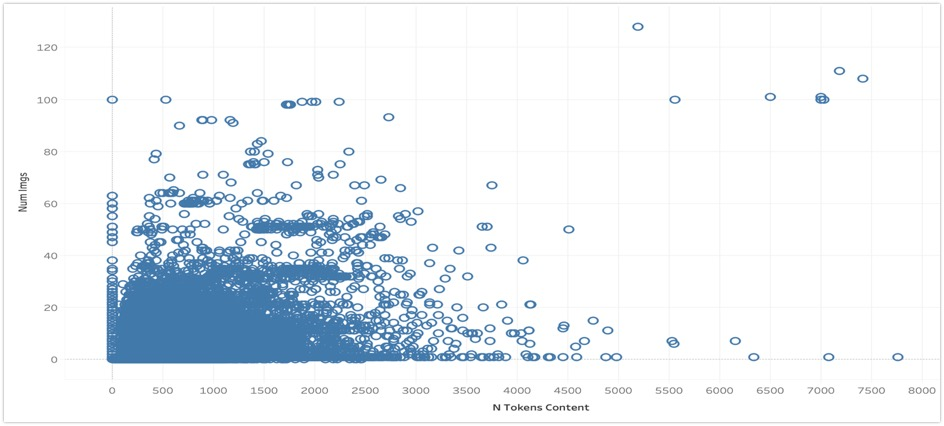
From the above Analysis we are able to Analyze that for what token lengths the number of images should be more. By observing the above graph we can say that till min of 2000 tokens or words we need to have minimum of 30 images and gradually the increase in tokens we need to increase in images so that people who are reading these articles have more understanding in a visualizing way.


Token length Vs Shares:

 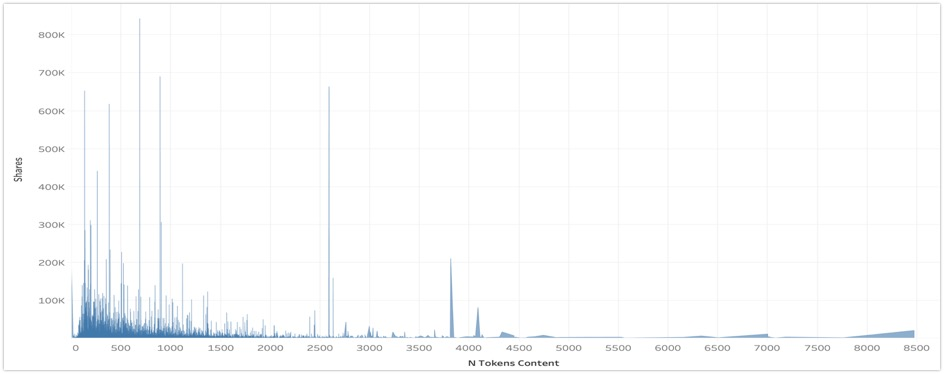
Plotted this graph is mainly to analyze at what token length or at what length of articles the people are liking the articles and shared most. By observing the above graph we can actually say that people are reading the short articles most and shared a lot and the other one are very length article who has more 2000 tokens has been read and shared a lot. By this we can understood that users are of two types who are concentrating on the content and the other are who are just observing what their need is presented in article in a straight-forward manner.


#Data PreProcessing:
we need to classify the articles into different categories we have choosed neural networks and  need to change the every different categories into one category and needed to perform one hot encoded which will finally placed into a vector of one column.
Then we performed cross-tabulation of every category in our data set and found out the distribution of categories in our data set. The below table shows the number of articles placed in each category:

Category	Number of articles in that category
World	        8427
technology	    7346
Social media	2323
Entertainment	7057
Lifestyle	    2099
Business	    6258

As we can observe the data classification if categories with Social media and life style has less variety of assumptions. We are dropping time delta and Url which is metadata of articles which won’t be any use in our regression model.



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
missing_values = ["n/a", "na", "--","-"]
newsdat=pd.read_csv("/kaggle/input/online-news-popularity/OnlineNewsPopularity.csv",na_values = missing_values)

In [ ]:
newsdat.shape

In [ ]:
newsdat.head(5)

In [ ]:
lifestyledf=newsdat[newsdat[' data_channel_is_lifestyle']==1]

In [ ]:
lifestyledf['dat_ch']='lifestyle'

In [ ]:
lifestyledf.shape

In [ ]:
entertainmentdf=newsdat[newsdat[' data_channel_is_entertainment']==1]

In [ ]:
entertainmentdf['dat_ch']='entertainment'

In [ ]:
entertainmentdf.shape

In [ ]:
busdf=newsdat[newsdat[' data_channel_is_bus']==1]

In [ ]:
busdf['dat_ch']='bus'

In [ ]:
busdf.shape

In [ ]:
socmeddf=newsdat[newsdat[' data_channel_is_socmed']==1]

In [ ]:
socmeddf['dat_ch']='socmed'

In [ ]:
socmeddf.shape

In [ ]:
techdf=newsdat[newsdat[' data_channel_is_tech']==1]

In [ ]:
techdf['dat_ch']='tech'

In [ ]:
techdf.shape

In [ ]:
worlddf=newsdat[newsdat[' data_channel_is_world']==1]

In [ ]:
worlddf['dat_ch']='world'

In [ ]:
worlddf.shape

In [ ]:
nonclasdf=newsdat[(newsdat[' data_channel_is_world']==0) & (newsdat[' data_channel_is_tech']==0) & (newsdat[' data_channel_is_socmed']==0) & (newsdat[' data_channel_is_bus']==0) & (newsdat[' data_channel_is_lifestyle']==0) & (newsdat[' data_channel_is_entertainment']==0)]

In [ ]:
nonclasdf['dat_ch']='other'

In [ ]:
nonclasdf.shape

In [ ]:
frames=[nonclasdf,worlddf,techdf,socmeddf,busdf,lifestyledf,entertainmentdf]
newsdatcr=pd.concat(frames,ignore_index=True)
newsdatcr=newsdatcr.drop(['url',' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world'],axis=1)

#Pearson Coorelation Analysis:

In [ ]:
plt.figure(figsize=(40,30))
cor = newsdatcr.corr(method ='pearson')
sns.heatmap(cor, cmap="RdYlGn")
plt.show()

By the above Pearson correlation graph we can say that number of unique words and number of non-stop-words and number of non-stop-unique tokens are strongly correlated which implies that they are strongly linearly dependent on each other. Same as the above case Kw-avg- min and kw-max-min are also strongly corelated.


#Feature Selection

By the above correlation graph we can clearly say that these features:
•	number of unique words and number of non-stop-words and number of non-stop-unique tokens
•	Kw-avg- min and kw-max-min
These are strongly correlated and linearly dependent which makes us to assume that these features are so linearly dependent that any one of the strong correlated feature can be used and excluding the other features won’t affect the model and will be indirectly helpful in our model by not allowing to do overfitting.


In [ ]:
newsdatcr=newsdatcr.drop([' n_non_stop_words',' n_unique_tokens',' kw_avg_min',' kw_avg_avg',' self_reference_avg_sharess'],axis=1)

#Feature Engineering:
Standardization has been performed so that all attributes have a mean 0 and deviation 1.

In [ ]:
newsdatcr.to_csv(r'Updatednewspopularity.csv')
X1= newsdatcr.iloc[:,0:49]
y1= newsdatcr.iloc[:,49]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)
Y1=y1.values


In [ ]:
encoder = LabelEncoder()

In [ ]:
newsdatcr.isnull().any()

In [ ]:
encoder.fit(Y1)

In [ ]:
encoded_Y1 = encoder.transform(Y1)
transf_y1 = np_utils.to_categorical(encoded_Y1)
transf_y1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, transf_y1, test_size=0.3)

#Neural Network model:

In [ ]:
model = Sequential()
model.add(Dense(800, input_dim=49, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=80, batch_size=32, verbose=1)

In [ ]:
eval_model=model.evaluate(X_train, y_train)
eval_model

In [ ]:
y_pred=model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

#Classification:

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

#Interpreting the Results:

* helps the digital platforms organizations to categorize their articles when they extracted it from different sources and have no clue, in which sector does this article belong, So by our model it will be very helpful for them to categorize these articles saving around a lot of manual labor time which can be put for more efficient purposes.

*  By the below figure Mashable can actually interpret that it needs to publish very less articles on Lifestyle and publish more on social media and technology articles
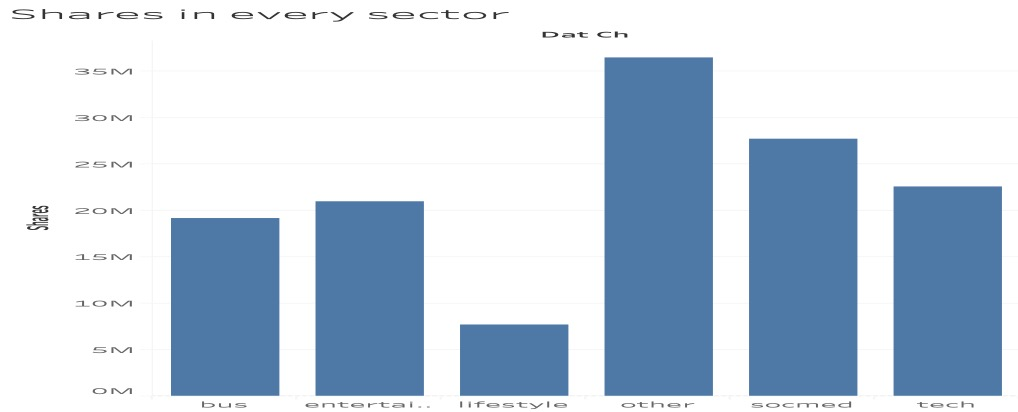

* By the below plot we can actually decide for maximum popularity of news what should be the minimum token lengths at each sector . Because many of users doesn’t like to read long articles and in some cases they like to if we observe in other category the users like to read short articles as we go for technology there averagely people are okay to read even long articles. This helps the Mashable Organization to decide for which sectors what should be their max and min token lengths for more shares or more popularity
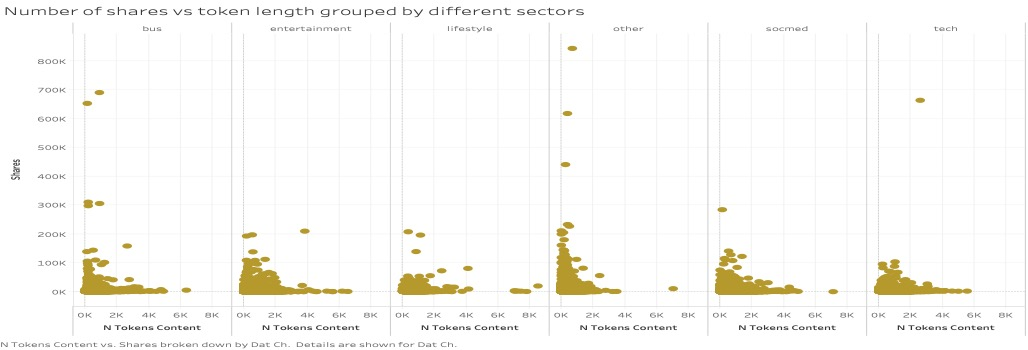